In [4]:
from __future__ import division
import numpy as np

from astropy import table

import astropyp

% matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

def gaussian(amplitude, x, y, x0, y0, sigma_x, sigma_y):
    return amplitude*np.exp(-.5*( (x-x0)**2/sigma_x**2+ (y-y0)**2/sigma_y**2))

np.random.seed(1)

src_count = 50
objs = np.random.random((src_count,2))*290+10
#amplitudes = np.random.random((src_count,))*5000+100
amplitudes = np.random.exponential(500,(src_count,))+100

Y,X = np.indices((300,300))
noise = np.random.poisson(10000,X.size).reshape(X.shape)*1e-3
data = noise
for amp,obj_pos in zip(amplitudes, objs):
    g = gaussian(amp,X,Y,obj_pos[1],obj_pos[0],5/2.355,5/2.355)
    data += g

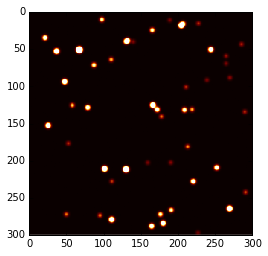

In [5]:
img = plt.imshow(data,cmap='afmhot',interpolation='none') 
norm = matplotlib.colors.Normalize(vmin=0, vmax=500) 
img.set_norm(norm)
plt.show()

INFO:astropyp.phot.psf:Total sources: 46
INFO:astropyp.phot.psf:Sources with low flux: 0
INFO:astropyp.phot.psf:Sources with low amplitude: 24
INFO:astropyp.phot.psf:Sources with bad pixels: 0
INFO:astropyp.phot.psf:Elliptical sources: 3
INFO:astropyp.phot.psf:Source with close neighbors: 23
INFO:astropyp.phot.psf:Sources near an edge: 1
INFO:astropyp.phot.psf:Sources after cuts: 8


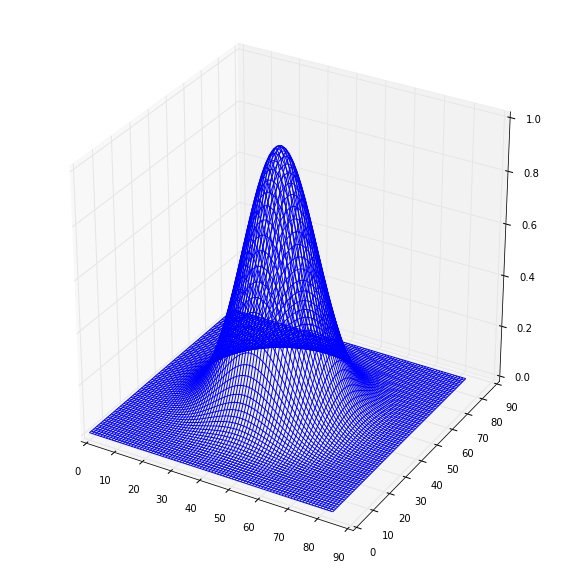

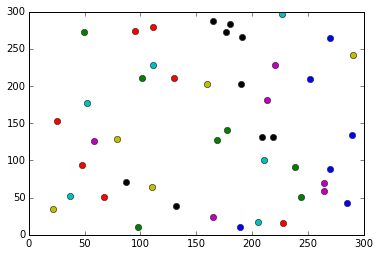

In [6]:
import sep
conv_filter = np.array([
    [0.030531, 0.065238, 0.112208, 0.155356, 0.173152, 0.155356, 0.112208, 0.065238, 0.030531],
    [0.065238, 0.139399, 0.239763, 0.331961, 0.369987, 0.331961, 0.239763, 0.139399, 0.065238],
    [0.112208, 0.239763, 0.412386, 0.570963, 0.636368, 0.570963, 0.412386, 0.239763, 0.112208],
    [0.155356, 0.331961, 0.570963, 0.790520, 0.881075, 0.790520, 0.570963, 0.331961, 0.155356],
    [0.173152, 0.369987, 0.636368, 0.881075, 0.982004, 0.881075, 0.636368, 0.369987, 0.173152],
    [0.155356, 0.331961, 0.570963, 0.790520, 0.881075, 0.790520, 0.570963, 0.331961, 0.155356],
    [0.112208, 0.239763, 0.412386, 0.570963, 0.636368, 0.570963, 0.412386, 0.239763, 0.112208],
    [0.065238, 0.139399, 0.239763, 0.331961, 0.369987, 0.331961, 0.239763, 0.139399, 0.065238],
    [0.030531, 0.065238, 0.112208, 0.155356, 0.173152, 0.155356, 0.112208, 0.065238, 0.030531]
])

# SExtractor 'extract' detection parameters
sex_params = {
    'extract': {
        'thresh': 50,# *bkg.globalrms,
        #'err':,
        #'minarea': 5, # default
        'conv': conv_filter,
        #'deblend_nthresh': 32, #default
        'deblend_cont': 0.001,
        #'clean': True, #default
        #'clean_param': 1 #default
    },
    'kron_k': 2.5,
    'kron_min_radius': 3.5,
    'filter': conv_filter,
    'thresh': 1.5
}

ccd = astropyp.phot.phot.SingleImage(img=data, gain=4., exptime=30, aper_radius=8)
ccd.detect_sources(sex_params)
ccd.select_psf_sources(1000,500, badpix_flags=[])
psf_array = ccd.create_psf()
ccd.show_psf()
psf_groups = ccd.create_psf_groups(verbose=True)
#good_idx = (ccd.catalog.sources['flags']==0) & (ccd.catalog.sources['peak']>100)
#psf_flux = ccd.perform_psf_photometry(indices=good_idx)